  #                                                           Applied Data Science Capstone by IBM/Coursera

## Table of contents

     Introduction:
              - Business Problem
              - Data
              - Methodology
              - Analysis
              - Results and Discussion
              - onclusion


## Introduction:    

### Business Problem :

                        The City of Lahore, is the most populous city in the Lahore. Lahore is a city with an extremely rich food culture. People from Lahore are famous all over the country for their love for food. The city offers a vast variety of options when it comes to gastronomy. In recent times, the style of food has achieved popularity in a number of different countries, because of its palatable and milder taste, mainly through the Pakistani diaspora. Moreover, there are many young people from lahore who visit Canada or some foreign countries for higher studies and they oftenly miss their home taste, therefore they face many difficulties to find some good food. Mostly people of lahore loves to eat "Daisi Food", Chinese Food and Italian Food. Therefore in this way they can find suitable place to get food easily.


### Data

Based on definition of our problem, factors that will influence our decision are:

Following data sources will be needed to extract/generate the required information:

I will use the FourSquare API to collect data / locations of restaurants in Toronto, Canada. As this is one of the most famous city of Canada. So many people who visits Canada they want to stay there.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

In [9]:
CLIENT_ID = 'Z3GYOID11DHZR23CXQJDPK5IW1MNDBIQLECJGKZPFJZAYASV' # your Foursquare ID
CLIENT_SECRET = '2CRHCHEXBQYBGYJKSLDSDFC1O2BM4D1AOMCORB3HVF4WDTVQ' # your Foursquare Secret
VERSION = '20192510' # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z3GYOID11DHZR23CXQJDPK5IW1MNDBIQLECJGKZPFJZAYASV
CLIENT_SECRET:2CRHCHEXBQYBGYJKSLDSDFC1O2BM4D1AOMCORB3HVF4WDTVQ


In [7]:
address = 'Lawrence Ave E, Toronto, Ontario M1R 2Y6, Canada'
geolocator = Nominatim()
location = geolocator.geocode(address, timeout=10)
latitude = location.latitude
longitude = location.longitude
print("Geographical Coordinates of "+address+" are"+' {}, {}'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


Geographical Coordinates of Lawrence Ave E, Toronto, Ontario M1R 2Y6, Canada are 43.7441072, -79.3008502


In [8]:
neigh_latitude = latitude
neigh_longitude = longitude

In [10]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neigh_latitude, 
    neigh_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Z3GYOID11DHZR23CXQJDPK5IW1MNDBIQLECJGKZPFJZAYASV&client_secret=2CRHCHEXBQYBGYJKSLDSDFC1O2BM4D1AOMCORB3HVF4WDTVQ&v=20192510&ll=43.7441072,-79.3008502&radius=500&limit=500'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e95aaeec94979001b379eb0'},
 'response': {'headerLocation': 'Wexford',
  'headerFullLocation': 'Wexford, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 43.748607204500004,
    'lng': -79.29463289050862},
   'sw': {'lat': 43.7396071955, 'lng': -79.30706750949138}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4cb66cf964a52065bb26e3',
       'name': 'Shawarma Empire',
       'location': {'address': '1823 Lawrence Ave. E',
        'crossStreet': 'at Pharmacy Ave.',
        'lat': 43.743405300438305,
        'lng': -79.30364913090075,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.743405300438305,
          'lng': -79.30364913090075}],
        'd

In [12]:
venues = results['response']['groups'][0]['items']
normalized_venues = json_normalize(venues)
normalized_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b4cb66cf964a52065bb26e3-0,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",4b4cb66cf964a52065bb26e3,1823 Lawrence Ave. E,CA,Scarborough,Canada,at Pharmacy Ave.,...,"[1823 Lawrence Ave. E (at Pharmacy Ave.), Scar...","[{'label': 'display', 'lat': 43.74340530043830...",43.743405,-79.303649,NaN,M1R 2Y3,ON,Shawarma Empire,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c27cddd9fb5d13a8cab9857-1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",4c27cddd9fb5d13a8cab9857,1885 Lawrence Ave.,CA,Toronto,Canada,NaN,...,"[1885 Lawrence Ave., Toronto ON, Canada]","[{'label': 'display', 'lat': 43.74351309578512...",43.743513,-79.301636,NaN,NaN,ON,Patna Kebab House,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bb0f805f964a520c66e3ce3-2,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",4bb0f805f964a520c66e3ce3,1909 Lawrence Ave E,CA,Toronto,Canada,NaN,...,"[1909 Lawrence Ave E, Toronto ON M1R 2Y6, Canada]","[{'label': 'display', 'lat': 43.74389829414246...",43.743898,-79.300996,NaN,M1R 2Y6,ON,Arz Fine Foods,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dd19e051838a75196486487-3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",4dd19e051838a75196486487,1821 Lawrence Ave E,CA,Toronto,Canada,Pharmacy Ave,...,"[1821 Lawrence Ave E (Pharmacy Ave), Toronto O...","[{'label': 'display', 'lat': 43.74363845933303...",43.743638,-79.304233,NaN,M1R 2Y3,ON,Ghadir Mid-Eastern Grocery,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dfd66db8877e9c47496666b-4,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",4dfd66db8877e9c47496666b,1867 Lawrence Ave. E.,CA,Toronto,Canada,Pharmacy Ave.,...,"[1867 Lawrence Ave. E. (Pharmacy Ave.), Toront...","[{'label': 'display', 'lat': 43.743512, 'lng':...",43.743512,-79.302300,NaN,M1R 2Y3,ON,Nasib's Shawarma & Falafel,0,[]


In [13]:
filter_columns = ['venue.name', 'venue.location.address', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
normalized_venues.loc[:,filter_columns]

,venue.name,venue.location.address,venue.categories,venue.location.lat,venue.location.lng
0,Shawarma Empire,1823 Lawrence Ave. E,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.743405,-79.303649
1,Patna Kebab House,1885 Lawrence Ave.,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",43.743513,-79.301636
2,Arz Fine Foods,1909 Lawrence Ave E,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",43.743898,-79.300996
3,Ghadir Mid-Eastern Grocery,1821 Lawrence Ave E,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",43.743638,-79.304233
4,Nasib's Shawarma & Falafel,1867 Lawrence Ave. E.,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.743512,-79.302300
5,Naan & Kabob Halal,1801 Lawrence Ave East,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.742903,-79.305148
6,Makkalchon Korean Restaurant 맛깔촌,1979 Lawrence Ave. E,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",43.744945,-79.296494
7,Ibrahim BBQ,1967 Lawrence Avenue East,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.744474,-79.297500
8,Big Moe's (Halal),1961 Lawrence Avenue East,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",43.744334,-79.297731
9,Super Hakka Restaurant,1801 Lawrence Ave E,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",43.742892,-79.304949


In [14]:
normalized_venues['venue.categories'][0][0]['name']

'Middle Eastern Restaurant'

In [15]:
def get_categories(results):
    category = results['venue.categories']
    if len(category) == 0:
        return None
    else:
        return category[0]['name']

In [16]:


normalized_venues['venue.categories'] = normalized_venues.apply(get_categories, axis=1)
normalized_venues.head()



,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b4cb66cf964a52065bb26e3-0,Middle Eastern Restaurant,4b4cb66cf964a52065bb26e3,1823 Lawrence Ave. E,CA,Scarborough,Canada,at Pharmacy Ave.,...,"[1823 Lawrence Ave. E (at Pharmacy Ave.), Scar...","[{'label': 'display', 'lat': 43.74340530043830...",43.743405,-79.303649,NaN,M1R 2Y3,ON,Shawarma Empire,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c27cddd9fb5d13a8cab9857-1,Indian Restaurant,4c27cddd9fb5d13a8cab9857,1885 Lawrence Ave.,CA,Toronto,Canada,NaN,...,"[1885 Lawrence Ave., Toronto ON, Canada]","[{'label': 'display', 'lat': 43.74351309578512...",43.743513,-79.301636,NaN,NaN,ON,Patna Kebab House,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bb0f805f964a520c66e3ce3-2,Supermarket,4bb0f805f964a520c66e3ce3,1909 Lawrence Ave E,CA,Toronto,Canada,NaN,...,"[1909 Lawrence Ave E, Toronto ON M1R 2Y6, Canada]","[{'label': 'display', 'lat': 43.74389829414246...",43.743898,-79.300996,NaN,M1R 2Y6,ON,Arz Fine Foods,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dd19e051838a75196486487-3,Grocery Store,4dd19e051838a75196486487,1821 Lawrence Ave E,CA,Toronto,Canada,Pharmacy Ave,...,"[1821 Lawrence Ave E (Pharmacy Ave), Toronto O...","[{'label': 'display', 'lat': 43.74363845933303...",43.743638,-79.304233,NaN,M1R 2Y3,ON,Ghadir Mid-Eastern Grocery,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dfd66db8877e9c47496666b-4,Middle Eastern Restaurant,4dfd66db8877e9c47496666b,1867 Lawrence Ave. E.,CA,Toronto,Canada,Pharmacy Ave.,...,"[1867 Lawrence Ave. E. (Pharmacy Ave.), Toront...","[{'label': 'display', 'lat': 43.743512, 'lng':...",43.743512,-79.302300,NaN,M1R 2Y3,ON,Nasib's Shawarma & Falafel,0,[]


In [17]:
required_details = normalized_venues.loc[:,filter_columns]

In [18]:
required_details.columns=['Name', 'Address', 'Categories', 'Latitude', 'Longitude']

In [19]:
required_details

,Name,Address,Categories,Latitude,Longitude
0,Shawarma Empire,1823 Lawrence Ave. E,Middle Eastern Restaurant,43.743405,-79.303649
1,Patna Kebab House,1885 Lawrence Ave.,Indian Restaurant,43.743513,-79.301636
2,Arz Fine Foods,1909 Lawrence Ave E,Supermarket,43.743898,-79.300996
3,Ghadir Mid-Eastern Grocery,1821 Lawrence Ave E,Grocery Store,43.743638,-79.304233
4,Nasib's Shawarma & Falafel,1867 Lawrence Ave. E.,Middle Eastern Restaurant,43.743512,-79.302300
5,Naan & Kabob Halal,1801 Lawrence Ave East,Middle Eastern Restaurant,43.742903,-79.305148
6,Makkalchon Korean Restaurant 맛깔촌,1979 Lawrence Ave. E,Korean Restaurant,43.744945,-79.296494
7,Ibrahim BBQ,1967 Lawrence Avenue East,Middle Eastern Restaurant,43.744474,-79.297500
8,Big Moe's (Halal),1961 Lawrence Avenue East,Burger Joint,43.744334,-79.297731
9,Super Hakka Restaurant,1801 Lawrence Ave E,Chinese Restaurant,43.742892,-79.304949


In [20]:
clean_data = required_details

In [21]:
clean_data = clean_data[clean_data['Address'].notnull()]
clean_data

,Name,Address,Categories,Latitude,Longitude
0,Shawarma Empire,1823 Lawrence Ave. E,Middle Eastern Restaurant,43.743405,-79.303649
1,Patna Kebab House,1885 Lawrence Ave.,Indian Restaurant,43.743513,-79.301636
2,Arz Fine Foods,1909 Lawrence Ave E,Supermarket,43.743898,-79.300996
3,Ghadir Mid-Eastern Grocery,1821 Lawrence Ave E,Grocery Store,43.743638,-79.304233
4,Nasib's Shawarma & Falafel,1867 Lawrence Ave. E.,Middle Eastern Restaurant,43.743512,-79.302300
5,Naan & Kabob Halal,1801 Lawrence Ave East,Middle Eastern Restaurant,43.742903,-79.305148
6,Makkalchon Korean Restaurant 맛깔촌,1979 Lawrence Ave. E,Korean Restaurant,43.744945,-79.296494
7,Ibrahim BBQ,1967 Lawrence Avenue East,Middle Eastern Restaurant,43.744474,-79.297500
8,Big Moe's (Halal),1961 Lawrence Avenue East,Burger Joint,43.744334,-79.297731
9,Super Hakka Restaurant,1801 Lawrence Ave E,Chinese Restaurant,43.742892,-79.304949


In [22]:


map_rest = folium.Map(location=[neigh_latitude, neigh_longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(clean_data['Latitude'], clean_data['Longitude'], clean_data['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [neigh_latitude, neigh_longitude],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_rest)  
    
map_rest



In [23]:
clean_data.head()

,Name,Address,Categories,Latitude,Longitude
0,Shawarma Empire,1823 Lawrence Ave. E,Middle Eastern Restaurant,43.743405,-79.303649
1,Patna Kebab House,1885 Lawrence Ave.,Indian Restaurant,43.743513,-79.301636
2,Arz Fine Foods,1909 Lawrence Ave E,Supermarket,43.743898,-79.300996
3,Ghadir Mid-Eastern Grocery,1821 Lawrence Ave E,Grocery Store,43.743638,-79.304233
4,Nasib's Shawarma & Falafel,1867 Lawrence Ave. E.,Middle Eastern Restaurant,43.743512,-79.302300


In [24]:
conditions = [
    (clean_data['Categories'].str.contains('Restaurant')),
    (clean_data['Categories'].str.contains('Store')),
    (clean_data['Categories'].str.contains('market')),
    (clean_data['Categories'].str.contains('Shop')),
    (clean_data['Categories'].str.contains('Place')),
    (clean_data['Categories'].str.contains('Joint')),
    (clean_data['Categories'].str.contains('Station')),
    (clean_data['Categories'].str.contains('Bar'))
]
results = ['Restaurant', 'Store', 'Market', 'Shop', 'Pizza Place', 'Joint', 'Station', 'Bar']

In [25]:
clean_data['Category_type'] = np.select(conditions, results, default='Unknown')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
clean_data.head()

,Name,Address,Categories,Latitude,Longitude,Category_type
0,Shawarma Empire,1823 Lawrence Ave. E,Middle Eastern Restaurant,43.743405,-79.303649,Restaurant
1,Patna Kebab House,1885 Lawrence Ave.,Indian Restaurant,43.743513,-79.301636,Restaurant
2,Arz Fine Foods,1909 Lawrence Ave E,Supermarket,43.743898,-79.300996,Market
3,Ghadir Mid-Eastern Grocery,1821 Lawrence Ave E,Grocery Store,43.743638,-79.304233,Store
4,Nasib's Shawarma & Falafel,1867 Lawrence Ave. E.,Middle Eastern Restaurant,43.743512,-79.302300,Restaurant


In [27]:
category_freq = clean_data['Category_type'].value_counts()
category_freq

Restaurant     9
Pizza Place    3
Store          2
Bar            2
Shop           2
Joint          2
Unknown        1
Station        1
Market         1
Name: Category_type, dtype: int64

In [29]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequencies')

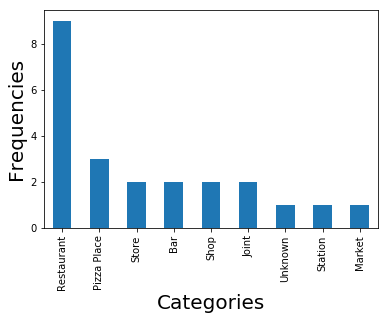

In [30]:


category_freq.plot.bar()
plt.xlabel("Categories", fontsize=20)
plt.ylabel("Frequencies", fontsize=20)



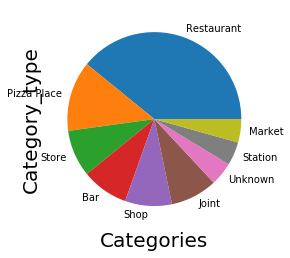

In [31]:


plt.xlabel("Categories", fontsize=20)
plt.ylabel("Frequencies", fontsize=20)
category_freq.plot.pie()



# DISCUSSION
In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.
I have created a good project that I can present as an example to show my potential. I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.¶

# Conclusion
The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.